In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-janjune-15.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Diplo_B01196.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Carmel_B00256.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Firstclass_B01536.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jul14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Highclass_B01717.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Lyft_B02510.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Dial7_B00887.csv
/kaggle/input/uber-pickups-in-new-york-city/other-FHV-services_jan-aug-2015.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Skyline_B00111.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-jun14.csv
/kaggle/input/uber-pickups-in-new-york-city/other-Prestige_B01338.csv
/kaggle/input/uber-pickups-in-new-york-city/uber-raw-data-aug14.csv
/kaggle/input/uber-pickup

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('../input/uber-pickups-in-new-york-city/uber-raw-data-sep14.csv')

In [4]:
df.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [5]:
df.shape

(1028136, 4)

In [6]:
df['Date/Time'].sample(5)

586380    9/25/2014 12:19:00
694894     9/7/2014 11:17:00
357552      9/7/2014 8:57:00
477992    9/16/2014 16:42:00
339213     9/5/2014 23:58:00
Name: Date/Time, dtype: object

In [7]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [8]:
df['Date/Time'].sample(5)

567280   2014-09-23 19:19:00
163664   2014-09-16 18:25:00
932899   2014-09-17 18:29:00
134710   2014-09-13 05:35:00
273329   2014-09-30 19:20:00
Name: Date/Time, dtype: datetime64[ns]

In [9]:
def get_dom(dt):
    return dt.day
df['dom']=df['Date/Time'].map(get_dom)

In [10]:
def get_weekday(dt):
    return dt.weekday()
df['weekday']=df['Date/Time'].map(get_weekday)
def get_hour(dt):
    return dt.hour
df['hour']=df['Date/Time'].map(get_hour)

In [11]:
df.sample(5)

,Date/Time,Lat,Lon,Base,dom,weekday,hour
873270,2014-09-06 18:17:00,40.7147,-73.9823,B02764,6,5,18
953561,2014-09-20 16:38:00,40.8933,-73.9734,B02764,20,5,16
708420,2014-09-09 14:50:00,40.6309,-74.0233,B02682,9,1,14
46832,2014-09-03 07:22:00,40.7443,-73.9936,B02598,3,2,7
480302,2014-09-16 19:03:00,40.6936,-73.9824,B02617,16,1,19


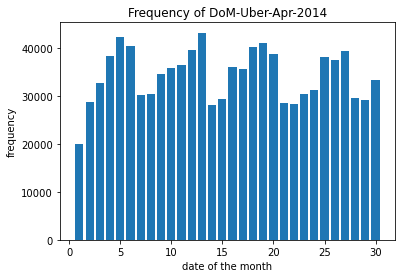

In [12]:
plt.hist(df.dom,bins=30,rwidth=.8,range=(0.5,30.5))
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM-Uber-Apr-2014')
plt.show()

In [13]:
def count_rows(rows):
    return len(rows)
by_date=df.groupby('dom').apply(count_rows)
by_date

dom
1     19961
2     28831
3     32631
4     38360
5     42319
6     40520
7     30134
8     30360
9     34560
10    35910
11    36439
12    39540
13    43205
14    28122
15    29454
16    36092
17    35531
18    40274
19    41017
20    38864
21    28620
22    28312
23    30316
24    31301
25    38203
26    37504
27    39468
28    29656
29    29201
30    33431
dtype: int64

<BarContainer object of 30 artists>

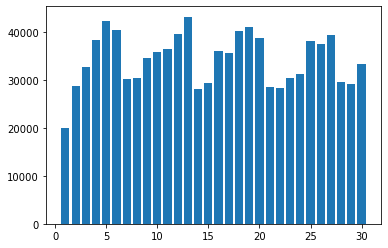

In [14]:
plt.bar(range(1,31),by_date)

In [15]:
by_date_sorted= by_date.sort_values()
by_date_sorted

dom
1     19961
14    28122
22    28312
21    28620
2     28831
29    29201
15    29454
28    29656
7     30134
23    30316
8     30360
24    31301
3     32631
30    33431
9     34560
17    35531
10    35910
16    36092
11    36439
26    37504
25    38203
4     38360
20    38864
27    39468
12    39540
18    40274
6     40520
19    41017
5     42319
13    43205
dtype: int64

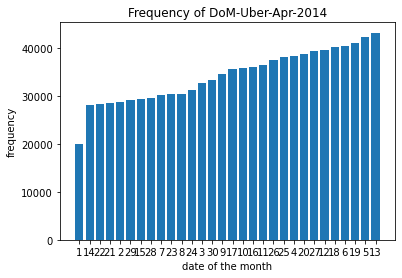

In [16]:
plt.bar(range(1,31),by_date_sorted)
plt.xticks(range(1,31),by_date_sorted.index)
plt.xlabel('date of the month')
plt.ylabel('frequency')
plt.title('Frequency of DoM-Uber-Apr-2014')
plt.show()

''

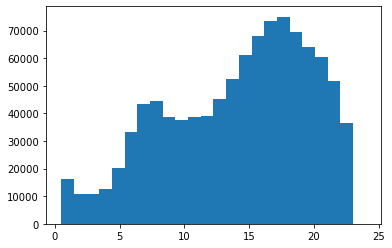

In [17]:
plt.hist(df.hour, bins=24, range=(.5, 24))
;

''

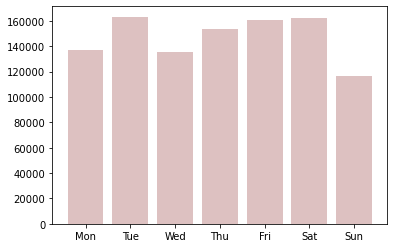

In [18]:
plt.hist(df.weekday, bins=7, range =(-.5,6.5), rwidth=.8, color='#AA6666', alpha=.4)
plt.xticks(range(7), 'Mon Tue Wed Thu Fri Sat Sun'.split())
;


''

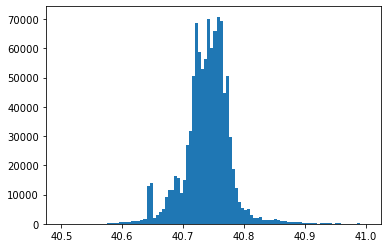

In [19]:
plt.hist(df['Lat'], bins=100, range = (40.5, 41))
;

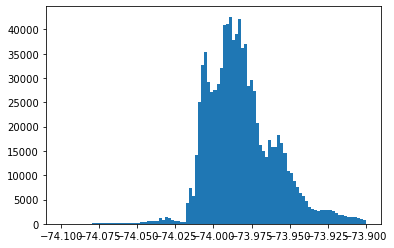

In [20]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9));

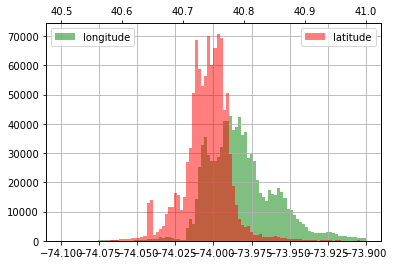

In [21]:
plt.hist(df['Lon'], bins=100, range = (-74.1, -73.9), color='g', alpha=.5, label = 'longitude')
plt.grid()
plt.legend(loc='upper left')
plt.twiny()
plt.hist(df['Lat'], bins=100, range = (40.5, 41), color='r', alpha=.5, label = 'latitude')
plt.legend(loc='best');

(40.7, 41.0)

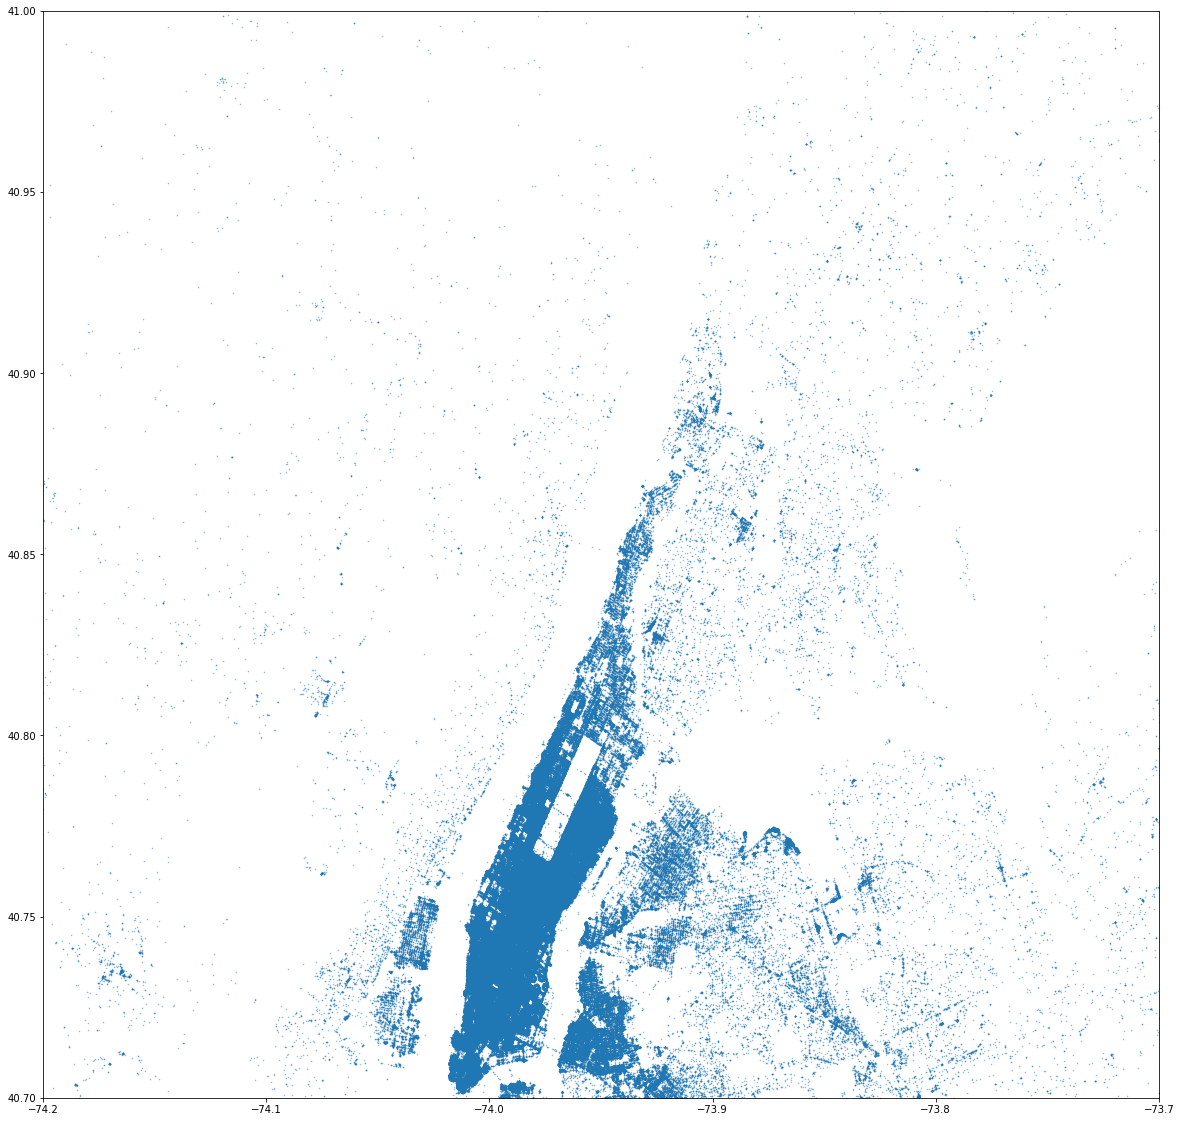

In [22]:
plt.figure(figsize=(20, 20))
plt.plot(df['Lon'], df['Lat'], '.', ms=1, alpha=.5)
plt.xlim(-74.2, -73.7)
plt.ylim(40.7, 41)